In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
  
import pandas as pd        
import seaborn as sns        
import sklearn             

# Прогнозирование оттока клиентов из телекоммуникационных компаний
## 0. Описание задачи


Решение задачи направлено на прогнозирование поведения клиентов телекомуникационной компании. Для объекта с определенным набором признаков программа должна предсказывать откажется ли клиент от предоставляемых услуг в ближайшее время. 

*Содержание*
Данные об оттоке клиентов телекоммуникационной компании содержат информацию о вымышленной телекоммуникационной компании, которая предоставляла услуги домашнего телефона и Интернета 7043 клиентам в Калифорнии в 3 квартале. 

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента, описанные в метаданных столбца.
Для каждого клиента включено несколько важных демографических показателей, а также показатель удовлетворенности, показатель оттока и индекс ценности жизни клиента (CLTV).


*Содержание набора данных:*
1. Клиенты, которые ушли в течение последнего месяца – колонка называется Отток
2. Услуги, на которые зарегистрировался каждый клиент – телефон, несколько линий, Интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройств, техническая поддержка и потоковое телевидение и фильмы
3. Информация об учетной записи клиента – как долго он был клиентом, контракт, способ оплаты, безбумажное выставление счетов, ежемесячные платежи и общая сумма сборов
4. Демографическая информация о клиентах – пол, возрастной диапазон, а также есть ли у них партнеры и иждивенцы



## 1. Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/Maria-Volkova98/-/main/Telco-Customer-Churn.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(7043, 21)

## 2. Визуализация данных и вычисление основных характеристик

In [4]:
data_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data_raw.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


*Сводная информация о количественных признаках*

In [6]:
data_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Для каждого количественного признака (tenure - количество месяцев пользования услугами, MonthlyCharges - ежемесячные платежи,TotalCharges - общие расходы клиента) должны быть приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

*Возникшие проблемы:*

1. Можно заметить, что признак SeniorCitizen, отвечающий за пренадлежность гражданина к пожилому возрасту, имеет целочисленный тип, поэтому включен в сводку средних значений.
Далее нам придется обработать все категориальные признаки, поэтому оставим данный признак в числовом типе.

2. Отсутствует признак TotalCharges, следовательно, он имеет не числовой тип. 
В Exel было проведено исследование столбца TotalCharges и обнаружено, что некоторые ячейки содержат пробелы. 

In [7]:
data_raw.loc[488, 'TotalCharges']

' '

Определим, сколько объектов с пропущенными значениями


In [8]:
data_raw.loc[(data_raw.TotalCharges == " "), 'TotalCharges'].count()

11

Удалим строки с пропущенными значениями, в нашем случае это разумно, так как таких строк всего 11

In [9]:
rows_to_drop = data_raw[(data_raw['TotalCharges'] == " ")].index
data = data_raw.drop(rows_to_drop)
data.shape


(7032, 21)

Столбец 'TotalCharges' пока имеет тип 'Object', заменим тип на вещественный.

In [10]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

### Рассмотрим сводную информацию о количественных признаках:

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Рассмотрим сводную информацию о категориальных признаках:

Большинство столбцов содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [12]:
data = data.drop (columns = 'customerID')

In [13]:
categorical_columns = []
numerical_columns = []
for c in data.columns:
    if data[c].dtype.name == 'object':
        categorical_columns.append(c)
        data[c]=data[c].astype('category')
    else:
        numerical_columns.append(c)
print(categorical_columns)
print(numerical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [14]:
data.describe(include=['category'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Построим диаграмму рассеивания для признаков ''MonthlyCharges'' и 'tenure':

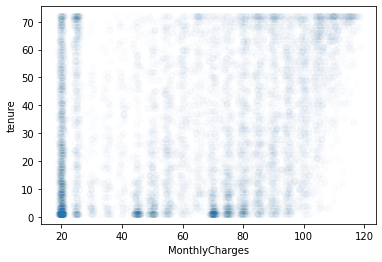

In [15]:
plt.scatter(data['MonthlyCharges'], data['tenure'], alpha=0.01)
plt.xlabel('MonthlyCharges')
plt.ylabel('tenure')
pass

Из рисунка видно, что, по-видимому, никакой зависимости между количеством месяцев пользования услугами компании и ежемесячными платежами нет.

Построим диаграмму рассеивания для признаков ''MonthlyCharges'' и 'InternetService':

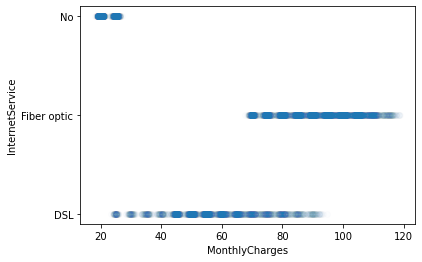

In [16]:
plt.scatter(data['MonthlyCharges'], data['InternetService'], alpha=0.01)
plt.xlabel('MonthlyCharges')
plt.ylabel('InternetService')
pass

Данный график показывает зависимость стоимости тарифа от выбора интернет-сервиса

In [17]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

Построим все возможные диаграммы рассеивания для каждой пары переменных:

No handles with labels found to put in legend.


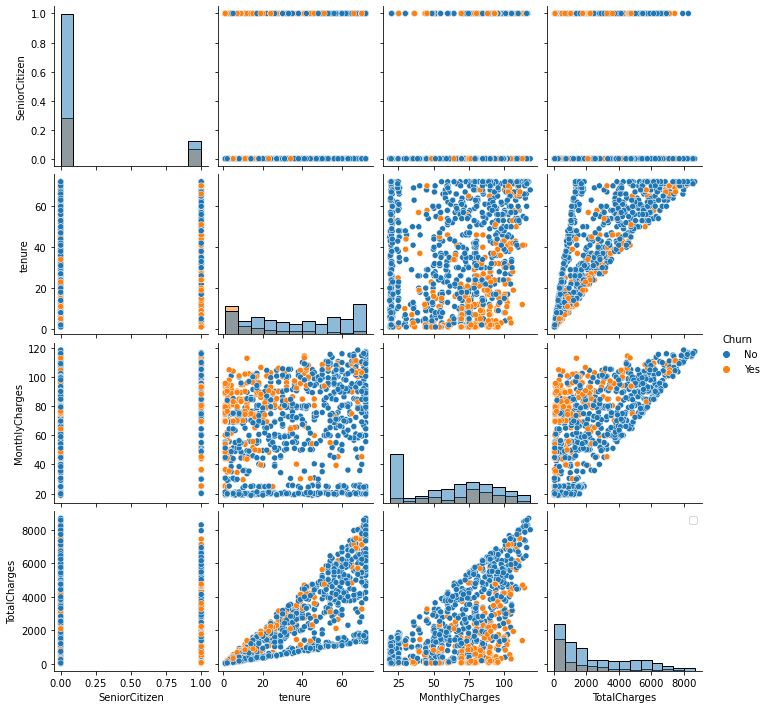

In [18]:
sns.pairplot(data.iloc[random_subset], hue='Churn', diag_kind='hist')
plt.legend()
pass

На диаграммах наблюдается корреляция между tenure и TotalCharges, а так же между MonthlyCharges и TotalCharges.
Это означает, что существуют зависимости между количеством месяцев пользования услугами компании и общей суммой расходов клиента, а так же между ежемесячными платежами и общей суммой расходов клиента.

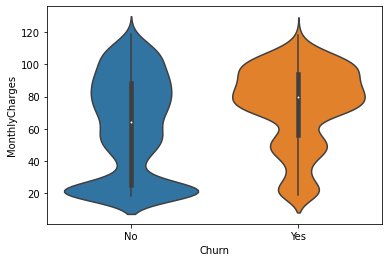

In [19]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=data)
pass

Из скрипичных графиков видно, что в существует зависимость оттака клиентов от размера ежемесячного платежа: при более низкой плате - клиенты оставались, наиболее частый отток наблюдается с повышением тарифа.

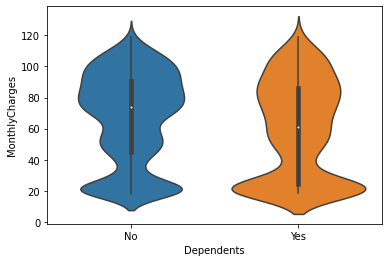

In [20]:
sns.violinplot(x="Dependents", y="MonthlyCharges", data=data)
pass

Так же можно установить зависимость между стоимостью тарифа и наличием иждивенцев (дети, бабушки, дедушки, родители) в семье. Граждане, метериально обеспечивабщие иждевенцев, чаще берут более дешевый тариф.

Вычислим матрицу корреляции для количественных признаков:

In [21]:
corr_mat = data.corr()
corr_mat

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [22]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

tenure          TotalCharges    0.825880
MonthlyCharges  TotalCharges    0.651065
dtype: float64

Полученные корреляционные значения подтверждают зависимости установленные выше с помощью графиков.

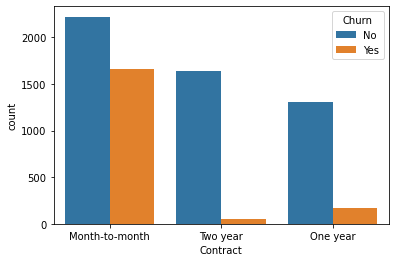

In [23]:
sns.countplot(x='Contract', order=data['Contract'].value_counts().index, hue='Churn', data=data)
pass

Можно заметить, что большинство отказов от продолжения пользования услугами телекомуникационной компании приходится на ежемесячные контракты.

### 3. Обработка пропущенных значений
Явных пропущенных значений не имееется:

In [24]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Однако в некоторых признаках, свидетельствующих о подключении различных видов услуг в некоторых ячейках приводится *No internet service*. Заменим данное значение на *No* в столбцах *OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,StreamingMovies*, чтобы привести признаки к бинарному типу.

In [25]:
data.loc[(data.OnlineSecurity == "No internet service"), 'OnlineSecurity'] = 'No'
data.loc[(data.OnlineBackup == "No internet service"), 'OnlineBackup'] = 'No'
data.loc[(data.DeviceProtection == "No internet service"), 'DeviceProtection'] = 'No'
data.loc[(data.TechSupport == "No internet service"), 'TechSupport'] = 'No'
data.loc[(data.StreamingTV == "No internet service"), 'StreamingTV'] = 'No'
data.loc[(data.StreamingMovies == "No internet service"), 'StreamingMovies'] = 'No'

Так же признак *MultipleLines* имеет 3 варианта: Yes, No, No phone service.
Заменим *No phone service* на *No*, чтобы привести признак к бинарному типу.


In [26]:
data.loc[(data.MultipleLines == "No phone service"), 'MultipleLines'] = 'No'

###  4. Обработка категориальных признаков

In [27]:
data_describe = data.describe(include = ['category'])

In [28]:
print (categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Удалим столбец customerID:

In [29]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'] ['InternetService', 'Contract', 'PaymentMethod']


In [30]:
len(binary_columns)


13

In [31]:
len(nonbinary_columns)

3

In [32]:
for i in binary_columns:
    data[i] = pd.factorize(data[i])[0]

In [33]:
#data['gender'] = pd.factorize(data['gender'])[0]
#data['Partner'] = pd.factorize(data['Partner'])[0]
#data['Dependents'] = pd.factorize(data['Dependents'])[0]
#data['PhoneService'] = pd.factorize(data['PhoneService'])[0]
#data['PaperlessBilling'] = pd.factorize(data['PaperlessBilling'])[0]
#data['Churn'] = pd.factorize(data['Churn'])[0]

In [34]:

InternetService_dummies = pd.get_dummies(data['InternetService'])
data = pd.concat((data, InternetService_dummies), axis=1)
data = data.drop(['InternetService'], axis=1)

In [35]:
Contract_dummies = pd.get_dummies(data['Contract'])
data = pd.concat((data, Contract_dummies), axis=1)
data = data.drop(['Contract'], axis=1)
PaymentMethod_dummies = pd.get_dummies(data['PaymentMethod'])
data = pd.concat((data, PaymentMethod_dummies), axis=1)
data = data.drop(['PaymentMethod'], axis=1)

### 5. Нормализация количественных признаков
Выполним стандартизацию всех признаков:

In [36]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [37]:
data_stand.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
count,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,...,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03
mean,-4.890223e-16,-7.351359e-16,-1.000337e-16,1.062574e-15,-9.488681e-17,2.104877e-15,5.785096e-16,-1.789745e-16,-4.417526e-16,1.012336e-16,...,-4.524254e-16,-1.185375e-16,-8.853997e-16,-9.179233e-17,-4.089132e-17,-5.744678e-16,7.009941e-18,-4.969795e-16,3.271621e-16,2.848025e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.009358e+00,-4.402958e-01,-1.035543e+00,-6.522585e-01,-1.280157e+00,-3.056117e+00,-8.542748e-01,-6.337013e-01,-1.378232e+00,-7.238665e-01,...,-7.234103e-01,-8.868334e-01,-5.250931e-01,-1.107816e+00,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
25%,-1.009358e+00,-4.402958e-01,-1.035543e+00,-6.522585e-01,-9.542285e-01,3.271661e-01,-8.542748e-01,-6.337013e-01,-1.378232e+00,-7.238665e-01,...,-7.234103e-01,-8.868334e-01,-5.250931e-01,-1.107816e+00,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
50%,9.905875e-01,-4.402958e-01,9.655394e-01,-6.522585e-01,-1.394072e-01,3.271661e-01,-8.542748e-01,-6.337013e-01,7.254640e-01,-7.238665e-01,...,-7.234103e-01,-8.868334e-01,-5.250931e-01,9.025485e-01,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
75%,9.905875e-01,-4.402958e-01,9.655394e-01,1.532916e+00,9.198605e-01,3.271661e-01,1.170417e+00,1.577806e+00,7.254640e-01,1.381274e+00,...,1.382145e+00,1.127447e+00,-5.250931e-01,9.025485e-01,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,1.404664e+00,-5.435649e-01
max,9.905875e-01,2.270878e+00,9.655394e-01,1.532916e+00,1.612459e+00,3.271661e-01,1.170417e+00,1.577806e+00,7.254640e-01,1.381274e+00,...,1.382145e+00,1.127447e+00,1.904153e+00,9.025485e-01,1.943357e+00,1.781247e+00,1.886745e+00,1.903355e+00,1.404664e+00,1.839445e+00


### 6. Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [38]:

X = data_stand.drop(['Churn'], axis=1)
y = data['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(5274, 1758)

### 7. Заупустим классификатор ближайших соседей:

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
knn

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_test_predict = knn.predict(X_test)

### 8. Вычисление ошибки на тестовой и обучающей выборке:

In [43]:
err_test  = np.mean(y_test  != y_test_predict)

In [44]:
err_test

0.22810011376564276

In [45]:
err_train = np.mean(y_train != knn.predict(X_train))

In [46]:
err_train

0.1863860447478195

In [47]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1152  148]
 [ 253  205]]


In [48]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подберем наиболее удачные параметры:

In [49]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.20838113104479328 25


In [50]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1962457337883959 0.22013651877133106


## Выводы

При параметре 45 ближайших соседей мы получили наименьшие ошибки на тестовой и обучающей выборках.

Random Forest

In [51]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0017064846416382253 0.2150170648464164


SVC

In [52]:

from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.17633674630261661 0.20819112627986347
